### 필수과제 
- melt 이용
- 날씨데이터( 기상청 데이터 ) 다운로드 받아주시고 지역은 본인이 원하는 지역으로 설정해 주세요! 
- 날씨데이터는 인덱스 기준이 시계열 데이터
- 시계열 데이터를 인덱스를 기준으로해서 병합을 해야한다.

- 어떤 걸 병합할까요?
- 주제는 자유이고 기온이나, 강우량 해당 날씨 데이터와 요인이 있을 것 같은 사회적인 변수 데이터나 경제 데이터나 소비자데이터 등을 같이 다운로드 받아서
- 시계열을 기준으로 하나의 데이터 컬럼을 만들어 주세요!
- 공공데이터, 통계청kosis 데이터 등 
- Ex) 날씨와 경제변수가 상관이 있을까?
- 두 개의 데이터를 구해서 시계열을 기준으로 깔끔하게 병합고
- 데이터 분석에 필요한 전처리 후에 시각화를 진행해서 실제 본인이 가설을 세운 것이 시각적으로 봤을 때 어떻게 나오는지 확인해 주시고 주석처리 부탁드립니다!

- 데이터 범위는 1~2년 최소 / 일자별데이터로 가져오시면 좋고/ 일자별이 없으면 월별 괜찮습니다!

- 다음시간 시계열 데이터를 배울 것 
- 시계열 예측에 대한 것도 진행해 보면서 어떤 식으로 진행되는지 확인해보자!

#### 평균기온과 공공자전거 대여는 유의한 상관관계가 있을까?

In [87]:
import pandas as pd

In [88]:
weather = pd.read_csv("../dataset/seoul_weather_2021.csv", encoding='cp949')

# 서웉특별시의 2021년 일별 평균기온 dataset

In [89]:
weather

,지점,지점명,일시,평균기온(°C)
0,108,서울,2022-01-01,-4.3
1,108,서울,2022-01-02,-1.3
2,108,서울,2022-01-03,-1.9
3,108,서울,2022-01-04,-2.5
4,108,서울,2022-01-05,-2.8
...,...,...,...,...
360,108,서울,2022-12-27,-2.6
361,108,서울,2022-12-28,-3.3
362,108,서울,2022-12-29,-2.9
363,108,서울,2022-12-30,-1.8


In [90]:
#서울특별시 공공자전거 일별 대여건수 dataset

bike1 = pd.read_csv("../dataset/서울특별시 공공자전거 일별 대여건수_22.01-22.06.csv")
bike2 = pd.read_csv("../dataset/서울특별시 공공자전거 일별 대여건수_22.07-22.12.csv")

# 맥에서 공공데이터 encoding 문제
# https://teddylee777.github.io/pandas/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%95%9C%EA%B8%80%EA%B9%A8%EC%A7%90%ED%98%84%EC%83%81-%ED%95%B4%EA%B2%B0%EB%B0%A9%EB%B2%95/

In [91]:
bike1

,대여일시,대여건수
0,2022.1.1,"29,185"
1,2022.1.2,"28,914"
2,2022.1.3,"53,573"
3,2022.1.4,"56,344"
4,2022.1.5,"57,413"
...,...,...
176,2022.6.26,"122,474"
177,2022.6.27,"94,761"
178,2022.6.28,"112,003"
179,2022.6.29,"52,664"


In [92]:
bike2

,대여일시,대여건수,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2022.7.1,"157,478",NaN,NaN,NaN,NaN
1,2022.7.2,"131,815",NaN,NaN,NaN,NaN
2,2022.7.3,"114,470",NaN,NaN,NaN,NaN
3,2022.7.4,"151,497",NaN,NaN,NaN,NaN
4,2022.7.5,"149,259",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
207,NaN,NaN,NaN,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN
210,NaN,NaN,NaN,NaN,NaN,NaN


### bike2는 필요없는 데이터가 많음, NaN값을 모두 지워줌

In [93]:
bike2.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4', 'Unnamed: 5'], axis=1, inplace=True)


In [94]:
bike2.dropna(axis=0,inplace=True)


In [95]:
bike2

,대여일시,대여건수
0,2022.7.1,"157,478"
1,2022.7.2,"131,815"
2,2022.7.3,"114,470"
3,2022.7.4,"151,497"
4,2022.7.5,"149,259"
...,...,...
179,2022.12.27,"58,890"
180,2022.12.28,"54,012"
181,2022.12.29,"57,393"
182,2022.12.30,"56,058"


In [96]:
bike = pd.concat([bike1,bike2], axis=0)
bike

,대여일시,대여건수
0,2022.1.1,"29,185"
1,2022.1.2,"28,914"
2,2022.1.3,"53,573"
3,2022.1.4,"56,344"
4,2022.1.5,"57,413"
...,...,...
179,2022.12.27,"58,890"
180,2022.12.28,"54,012"
181,2022.12.29,"57,393"
182,2022.12.30,"56,058"


#### -  bike dataframe은 365 row로 1년 data를 모두 모음

#### - bike의 '대여일시' column을 weather의 column 명과 동일하게하여 dataframe을 병합

In [97]:
bike.rename(columns= {'대여일시' : '일시'}, inplace=True)
bike

,일시,대여건수
0,2022.1.1,"29,185"
1,2022.1.2,"28,914"
2,2022.1.3,"53,573"
3,2022.1.4,"56,344"
4,2022.1.5,"57,413"
...,...,...
179,2022.12.27,"58,890"
180,2022.12.28,"54,012"
181,2022.12.29,"57,393"
182,2022.12.30,"56,058"


In [98]:
weather_bike = pd.merge(weather, bike, on='일시')
weather_bike

,지점,지점명,일시,평균기온(°C),대여건수


- weather 일시는 2022-01-01 형식이고, bike형식은 2022.01.01 형식이라 merge가 불가능

In [106]:
bike['일시'] = pd.to_datetime(bike['일시'])
weather['일시'] = pd.to_datetime(weather['일시'])

In [107]:
bike

,일시,대여건수
0,2022-01-01,"29,185"
1,2022-01-02,"28,914"
2,2022-01-03,"53,573"
3,2022-01-04,"56,344"
4,2022-01-05,"57,413"
...,...,...
179,2022-12-27,"58,890"
180,2022-12-28,"54,012"
181,2022-12-29,"57,393"
182,2022-12-30,"56,058"


In [108]:
weather_bike = pd.merge(weather, bike, on='일시')
weather_bike

,지점,지점명,일시,평균기온(°C),대여건수
0,108,서울,2022-01-01,-4.3,"29,185"
1,108,서울,2022-01-02,-1.3,"28,914"
2,108,서울,2022-01-03,-1.9,"53,573"
3,108,서울,2022-01-04,-2.5,"56,344"
4,108,서울,2022-01-05,-2.8,"57,413"
...,...,...,...,...,...
360,108,서울,2022-12-27,-2.6,"58,890"
361,108,서울,2022-12-28,-3.3,"54,012"
362,108,서울,2022-12-29,-2.9,"57,393"
363,108,서울,2022-12-30,-1.8,"56,058"


In [109]:
# 지점, 지점명 은 모두 동일하므로 제거

weather_bike.drop(['지점','지점명'], axis=1, inplace=True)
weather_bike

,일시,평균기온(°C),대여건수
0,2022-01-01,-4.3,"29,185"
1,2022-01-02,-1.3,"28,914"
2,2022-01-03,-1.9,"53,573"
3,2022-01-04,-2.5,"56,344"
4,2022-01-05,-2.8,"57,413"
...,...,...,...
360,2022-12-27,-2.6,"58,890"
361,2022-12-28,-3.3,"54,012"
362,2022-12-29,-2.9,"57,393"
363,2022-12-30,-1.8,"56,058"


In [110]:
from matplotlib import pyplot as plt
import seaborn as sns

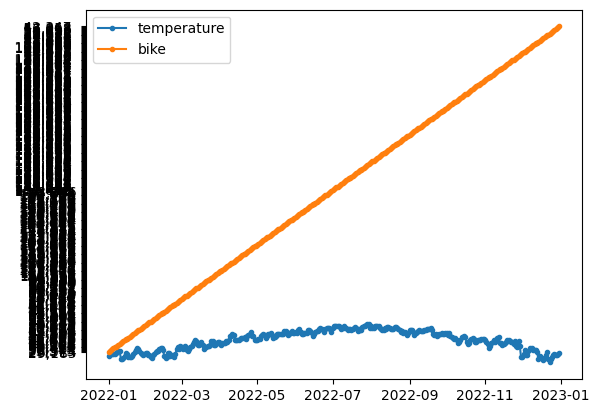

In [112]:
plt.plot(weather_bike['일시'], weather_bike['평균기온(°C)'], marker='.', label = 'temperature')
plt.plot(weather_bike['일시'], weather_bike['대여건수'], marker='.', label = 'bike')
plt.legend()

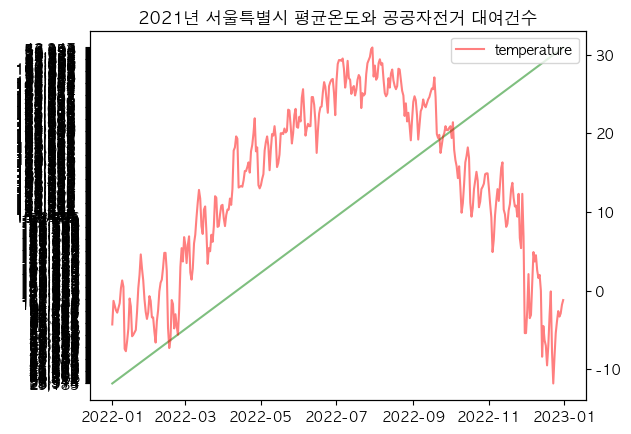

<Figure size 4000x4000 with 0 Axes>

In [166]:
#두 그래프의 scale을 맞춰주기위해 그래프 두개를 그리고, twinx method를 사용

import numpy as np
from matplotlib import rc

rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False


fig, ax1 = plt.subplots()

plt.plot(weather_bike['일시'], weather_bike['대여건수'], color = 'green', alpha = 0.5, label = '공공자전거 대여')


ax2 = ax1.twinx()

#twinx method를 간단하게 설명하면, x축만 공유하고 y축은 따로 써라 라는 뜻입니다.

ax2.plot(weather_bike['일시'], weather_bike['평균기온(°C)'],color = 'red', alpha = 0.5, label = 'temperature')



plt.title("2021년 서울특별시 평균온도와 공공자전거 대여건수")

plt.legend()
plt.figure(figsize=(40,40))
plt.show()

### 위의 그래프는 틀렸다.

- 뭔가 문제가 있다.
- 대여건수의 max값은 10만이고, 12월달은 약 5만으로 보이는데 왜 1차원 직선이 그려지는지 모르겠다.

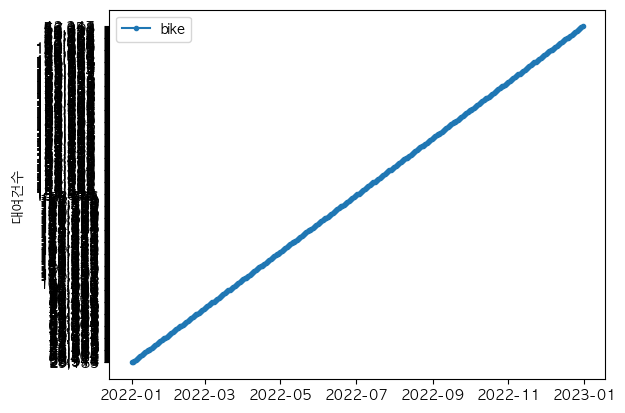

In [167]:
plt.plot(weather_bike['일시'], weather_bike['대여건수'], linestyle='-', marker='.', label = 'bike')
plt.ylabel('대여건수')
plt.legend()

In [164]:
bike.tail(30)

,일시,대여건수
154,2022-12-02,"84,067"
155,2022-12-03,"57,915"
156,2022-12-04,"44,873"
157,2022-12-05,"77,693"
158,2022-12-06,"80,832"
159,2022-12-07,"96,195"
160,2022-12-08,"100,979"
161,2022-12-09,"102,213"
162,2022-12-10,"72,960"
163,2022-12-11,"60,129"


In [168]:
print(weather_bike['대여건수'].min())
print(weather_bike['대여건수'].max())

 10,809 
98,151


In [175]:
type(weather_bike['대여건수'][1])

str

- 문제는 bike 대여건수가 숫자가 아니라 str type이기 때문이다.

In [178]:
weather_bike['대여건수'] = weather_bike['대여건수'].apply(lambda x: x.replace(',', ''))

In [179]:
weather_bike

,일시,평균기온(°C),대여건수
0,2022-01-01,-4.3,29185
1,2022-01-02,-1.3,28914
2,2022-01-03,-1.9,53573
3,2022-01-04,-2.5,56344
4,2022-01-05,-2.8,57413
...,...,...,...
360,2022-12-27,-2.6,58890
361,2022-12-28,-3.3,54012
362,2022-12-29,-2.9,57393
363,2022-12-30,-1.8,56058


In [180]:
weather_bike['대여건수'] = pd.to_numeric(weather_bike['대여건수'])

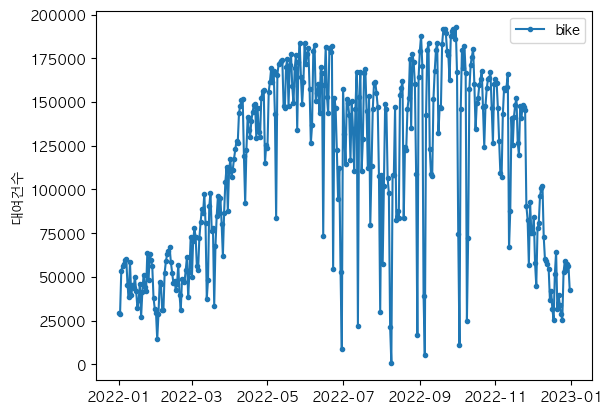

In [182]:
plt.plot(weather_bike['일시'], weather_bike['대여건수'], marker='.', label = 'bike')
plt.ylabel('대여건수')
plt.legend()

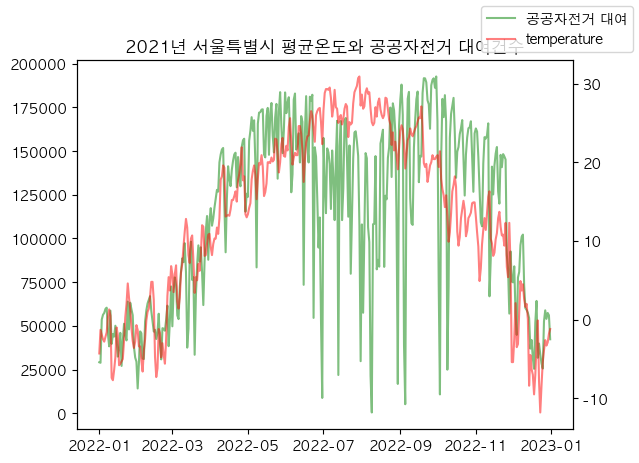

<Figure size 4000x4000 with 0 Axes>

In [186]:
#두 그래프의 scale을 맞춰주기위해 그래프 두개를 그리고, twinx method를 사용

import numpy as np
from matplotlib import rc

rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False


fig, ax1 = plt.subplots()

plt.plot(weather_bike['일시'], weather_bike['대여건수'], color = 'green', alpha = 0.5, label = '공공자전거 대여')


ax2 = ax1.twinx()

#twinx method를 간단하게 설명하면, x축만 공유하고 y축은 따로 써라 라는 뜻입니다.

ax2.plot(weather_bike['일시'], weather_bike['평균기온(°C)'],color = 'red', alpha = 0.5, label = 'temperature')



plt.title("2021년 서울특별시 평균온도와 공공자전거 대여건수")


fig.legend()
plt.figure(figsize=(40,40))
plt.show()